### Задача 
Реализовать алгоритм SVD-разложения на цветных картинках

### Шаг 1 
Имопртировать библтотеки numpy и PIL, скачать изображение и проверить, всё ли рабоатет

In [5]:
from PIL import Image
import numpy as np

img = Image.open("Cat.jpg")



### Шаг 2
Преобразовать картинку три числовых массива, каждый из которых отвечает за одну цветовую составляющую

In [7]:
x = np.array(img, dtype = np.float32)
red = x[:,:,0]
green = x[:,:,1]
blue = x[:,:,2]

### Шаг 3
Произвести SVD разложения каждой из матриц, проанализировать результаты

In [18]:
U_red, S_red, V_red = np.linalg.svd(red, full_matrices = False)
U_green, S_green, V_green = np.linalg.svd(green, full_matrices = False)
U_blue, S_blue, V_blue = np.linalg.svd(blue, full_matrices = False)
print(x.shape)
print(green.shape)



(618, 606, 3)
(618, 606)


Выведем количество сингулярнх значений для каждого из каналов:

In [16]:
print("количество сингулярных значений для красного цвета равно ", len(S_red))
print("количество сингулярных значений для зеленого цвета равно ", len(S_green))
print("количество сингулярных значений для голубого цвета равно ", len(S_blue))

количество сингулярных значений для красного цвета равно  606
количество сингулярных значений для зеленого цвета равно  606
количество сингулярных значений для голубого цвета равно  606


Как мы можем видеть, результаты одинаковы, это облегчит нам задачу

### Шаг 4
Генерация изображений по разным числам сингулярных значений. Так как эти значения отсортированы по величине, отсекание последних мало скажется на итоговом изображении. Таким образом, достаточно будет сгенерировать изображения только до r = 130, с шагом 10. Также, чтобы изберажать переполнения при конвертации из типа np.float32 в np.uint8 мы заменим всё, что меньше нуля - в ноль, а все что больше 255 - в 255.

In [22]:
for r in range (1, 130, 10):
    Y_r_red = U_red[:,:r].dot(np.diag(S_red[:r])).dot(V_red[:r,:]) 
    Y_r_red[Y_r_red < 0] = 0
    Y_r_red[Y_r_red > 255] = 255
    Y_r_red = Y_r_red.reshape(618, 606, 1)
    Y_r_green = U_green[:,:r].dot(np.diag(S_green[:r])).dot(V_green[:r,:]) 
    Y_r_green[Y_r_green < 0] = 0
    Y_r_green[Y_r_green > 255] = 255
    Y_r_green = Y_r_green.reshape(618, 606, 1)
    Y_r_blue = U_blue[:,:r].dot(np.diag(S_blue[:r])).dot(V_blue[:r,:]) 
    Y_r_blue[Y_r_blue < 0] = 0
    Y_r_blue[Y_r_blue > 255] = 255
    Y_r_blue = Y_r_blue.reshape(618, 606, 1)
    Y_r = np.concatenate((np.concatenate((Y_r_red, Y_r_green), axis = 2), Y_r_blue), axis = 2)
    Image.fromarray(np.asarray(Y_r, dtype=np.uint8)).save(f'{r}.meow.jpg')
    

### Шаг 5
Вывод котиков различной шакальности 

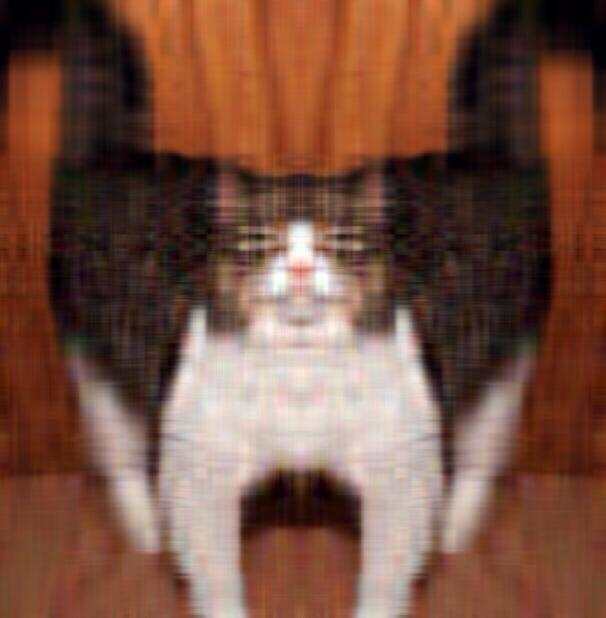

In [25]:
very_cursed = Image.open('11.meow.jpg')
very_cursed

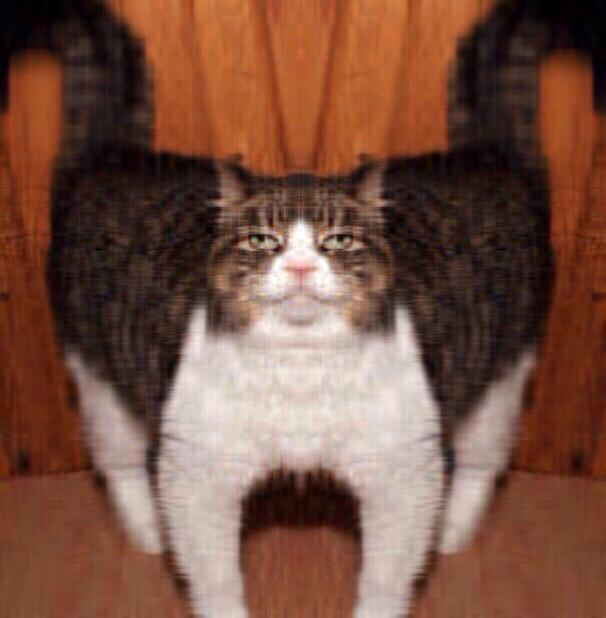

In [26]:
not_so_cursed = Image.open('21.meow.jpg')
not_so_cursed
    

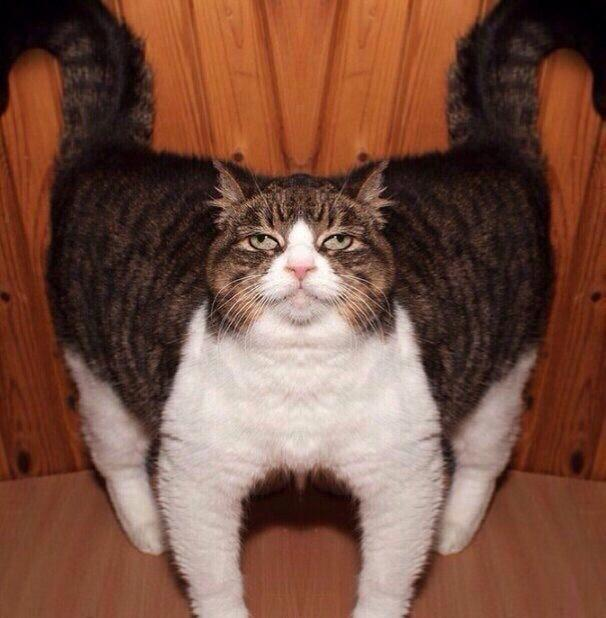

In [ ]:
not_cursed = Image.open('121.meow.jpg')
not_cursed
    

##### как мы можем видеть, при r=121 изображение уже мало отличимо от оригинала